|First Name     |Last Name    |MtkNr.      |Due Date  | 
|:-------------:|:-----------:|:----------:|:--------:|
| Stefan    | Haslhofer  |11908757     | 09.12.2025, 16:00

<h1 style="color:rgb(150,100,10)">Computer Vision Course</h1>
<h2 style="color:rgb(150,100,10)">Assignment 3 – Anomaly Detection, Object Tracking and Detection</h2>

<b>Authors:</b> O. Bimber, M. Abbass<br>
<b>Date:</b> 06-08-2025

<b>This file is part of the "Computer Vision Course 2025W" UE material.</b>

<h2 style="color:rgb(150,100,10)">Table of Contents</h2>
<ol>
    <a style="color:rgb(150,100,10)" href="#Anomaly-Motion-Detection"><li style="font-size:large;font-weight:bold">Anomaly Motion Detection [20 Points]</li></a>
    <ol style="margin-bottom:15px"> 
        <a style="color:rgb(150,100,10)" href="#Optical-Flow-Farneback-with-RX-Anomaly"><li style="font-size:medium">Optical Flow Farneback with RX Anomaly</li></a>
</ol>
    <a style="color:rgb(150,100,10)" href="#Object-Detection"><li style="font-size:large;font-weight:bold">Object Detection [40 Points]</li></a>
    <ol style="margin-bottom:15px">
        <a style="color:rgb(150,100,10)" href="#Apply-Faster-R-CNN-for-object-Detection"><li style="font-size:medium">Apply Faster R-CNN for object Detection</li></a>
        <a style="color:rgb(150,100,10)" href="#Applying-trained-Faster-R-CNN-to-your-Real-Image-Data"><li style="font-size:medium">Applying trained Faster R-CNN to your Real-Image Data</li></a>
</ol>
    </a>    
   <a style="color:rgb(150,100,10)" href="#Object-Tracking"><li style="font-size:large;font-weight:bold">Object Tracking [40 Points]</li></a>
  <ol style="margin-bottom:15px">
     <a style="color:rgb(150,100,10)" href="#Apply-Deep-SORT-and-Faster-R-CNN-for-object-detection-and-tracking"><li style="font-size:medium">Apply Deep SORT and Faster R-CNN for object detection and tracking</li></a>
      <a style="color:rgb(150,100,10)" href="#Testing-Deep-SORT-with-Faster-R-CNN-on-Your-Own-Video"><li style="font-size:medium">Testing Deep SORT with Faster R-CNN on Your Own Video</li></a>
</ol>
</a>
</ol>
</ol>

<h2 style="color:rgb(255,0,0)">Please be aware that in this assignment we train and evaluate some models, which requires time. Thus, please avoid submitting your assignment at the last minute</h2>

<h2 style="color:rgb(255,0,0)">Any content unrelated to the assignment, such as images, Python code (functions or classes), additional packages, or libraries, etc., will result in a deduction of 50 points.</h2>

<h1 style="color:rgb(255,0,0)">Important Note</h1>

<b>In this assignment, you may use the default parameters of any built-in function unless specified otherwise.</b>

<b style="color:rgb(255,70,0)">All cells must be executed; any unevaluated cell will not be considered, regardless of the correctness of the code.</b>

<b style="color:rgb(255,70,0)">All cells must be indexed; any non-indexed cell will not be considered.</b>

<b style="color:rgb(255,70,0)">Modifying the given code (even a single line), whether by replacing, changing, commenting, or removing, is strictly not allowed and will result in a loss of 50 points unless explicitly specified otherwise.</b>

<b style="color:rgb(255,70,0)">Redundant code, especially duplicating or copying the given code in different places, will result in a deduction of 25 points.</b>

<b style="color:rgb(255,70,0)">Importing the same packages multiple times in different cells will result in a deduction of 25 points.</b>

<b style="color:rgb(255,70,0)">All packages are imported in the first code cell. Any changes to this cell, including modifications, removals, or additions of packages or libraries, will result in a deduction of 50 points.</b>

<b>If you have GPU resources available on your machine, please utilize them; otherwise, you can use your CPU.</b>

<b>Always set the seed value to 123 unless specified otherwise.</b>


<h2 style="color:rgb(255,0,0)">Need to install the below packages</h2>

<b style="color:rgb(255,70,0)">pip install spectral</b>

<b style="color:rgb(255,70,0)">pip install pycocotools</b>


In [1]:
# Import all packages needed in this notebook.
import numpy as np
import cv2 as cv
from PIL import Image
import time, os
from matplotlib import pyplot as plt
from tqdm import tqdm
from spectral import *

import torch, torchvision
from torch.utils.data import DataLoader
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.datasets import CocoDetection
from torchvision.transforms import functional as F
from torchvision.transforms import ToTensor

from deep_sort_realtime.deepsort_tracker import DeepSort

if not os.path.exists('resources'): raise TypeError("Please create the resources folder and include all required files")
print('All necessary packages are successfully installed')

All necessary packages are successfully installed


<a name="Anomaly-Motion-Detection"></a><h2>Anomaly Motion Detection</h2>
    
The main goal is to visualize abnormal motion patterns in a video sequence using dense optical flow and RX anomaly detection.

RX Anomaly Detection uses the Reed-Xiaoli Detector (RXD) algorithm to identify color anomalies by comparing a target region with the surrounding pixels.
In this assignment, the target region is determined by the Farneback Optical Flow method.

<a></a><h4 style="color:rgb(20,10,10)">For your reference, the anomalyRX is available [Here](https://ieeexplore.ieee.org/abstract/document/60107).</h4>

<a name="Optical-Flow-Farneback-with-RX-Anomaly"></a><h3>Optical Flow Farneback with RX Anomaly</h3>

<b>Exercise 1.1. [5 Points]</b>

<b>Goal:</b> Apply <i><b>Dense Optical Flow</b></i> and <i><b>RX Anomaly Detection</b></i>.

<b>Task</b>
<ul>
<li>Use the <i><b>dense_RXDetect</b></i> function to apply RX Anomaly Detection.</li>
<li>Adjust the parameters of the dense optical flow. Keep the variable <i><b>fb_params</b></i> as it will be used later in the function.</li> 
<li>Use the provided video <i><b>Vid_A301</b></i>.</li>
</ul>

<b>Hint</b>
<li>Don’t forget to run the <i><b>RX_detector_image</b></i> function.</li>
<li><span style="color:rgb(180,10,10)">Modifications to the <i><b>dense_RXDetect</b></i> function are not allowed, except for adjusting the parameters of the dense optical flow in the variable <i><b>fb_params</b></i>. The result will be displayed in separate window.</span></li>
</ul>

In [2]:
def RX_detector_image(input_image, rxThreshold):
    rxScore = rx(input_image)

    min_rx_score = np.min(rxScore)
    max_rx_score = np.max(rxScore)
    rxScore = rxScore.astype(np.float32)
    
    rescaled_rx_score = ((rxScore - min_rx_score) / (max_rx_score - min_rx_score))
    rescaled_rx_score_int = np.asarray(rescaled_rx_score * 255, dtype=np.uint8)
    count, bins_count = np.histogram(rescaled_rx_score_int, bins=256)
    pdf = count / np.prod(np.size(rescaled_rx_score_int))
    cdf = np.cumsum(pdf)
    confCoefficient = [n for n, i in enumerate(cdf) if i > rxThreshold][1]
    bw = rescaled_rx_score_int > confCoefficient
    cv_bw = np.asarray(bw * 255, dtype=np.uint8)
    img = np.zeros((cv_bw.shape[0], cv_bw.shape[1], 3), dtype=input_image.dtype)
    img[:, :, 0] = cv_bw
    img[:, :, 1] = cv_bw
    img[:, :, 2] = cv_bw
    return img

In [3]:
def dense_RXDetect(path_Video):
    
    cap = cv.VideoCapture(cv.samples.findFile(path_Video))
    no_Frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    print( 'Total number of frames in this Exercise 1.1. is' , no_Frames )
    
    ret, prev_frame = cap.read()
    prev_gray = cv.cvtColor(prev_frame, cv.COLOR_BGR2GRAY)

    hsv = np.zeros_like(prev_frame)
    hsv[..., 1] = 255
    
    # Code goes here
    fb_params = { 'pyr_scale': 0.5, 'levels': 3, 'winsize': 15, 'iterations': 3, 'poly_n': 5, 'poly_sigma': 1.1, 'flags': 0 }
        
    
    while(1):
        ret, frame = cap.read()
        if not ret:
            print('No frames grabbed!')
            break
        
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        flow = cv.calcOpticalFlowFarneback(prev_gray, gray, None, **fb_params)
        
        hsv = cv.cvtColor(prev_frame, cv.COLOR_BGR2HSV)
        mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
        
        hsv[..., 0] = ang*90/np.pi/2 
        hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
        bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
        
        obj = RX_detector_image(bgr, 0.77) 
        img = cv.add(frame, obj)
        
        cv.imshow('Result after RX detector', img)        
        cv.imshow('Result dense optical flow', bgr)
        k = cv.waitKey(30)

        # Update previous frame
        prev_gray = gray
        prev_frame = frame
    print(f"All {no_Frames} frames are DONE in this Exercise")
    cap.release()
    cv.destroyAllWindows()

In [4]:
# code goes here
dense_RXDetect('./resources/Vid_A301.mp4')


Total number of frames in this Exercise 1.1. is 75
No frames grabbed!
All 75 frames are DONE in this Exercise


<b>Exercise 1.2. [15 Points]</b>

<b>Question</b>
<ul> 
<li>Q1) What do you expect from the RX detector when the camera moves forward instead of sideways?  
Hint: Your answer should be expressed in terms of optical flow and color coding.</li>
    
<li>Q2) The color map of the saturation channel is hard-coded in the dense_RXDetect function. Would the results of the RX detector change if we modify this color map?</li>
</ul>

<b>Hint</b>
<ul>
<li>Each question must be answered in <i><b>1~4 lines</b></i> maximum. Exceeding 4 lines may result in point deductions.</li>
</ul>

<b>The explanation goes here:</b>

A1) If the camera moves only forward the optical flow will point outward from a central point. Areas closer to the camera (in this case at the edges) appear faster and are therefore highlighted more brightly. The car will still be moving from right to left and is therefore highlighted as well.

A2) The movements would still be recognized as the optical flow calculation stays the same, however they would be highlighted in different colors. 

<a name="Object-Detection"></a><h2>Object Detection</h2>

The main goal is to utilize Faster R-CNN to detect objects. Afterwards, we can track the detected objects.  
In this assignment, we are supposed to train the model from scratch using a custom dataset.

<a name=">Apply-Faster-R-CNN-for-object-Detection"></a><h3>Apply Faster R-CNN for object Detection</h3>

<h3 style="color:rgb(150,75,0)">Let's work on our dataset and its preparation:</h3>
<ul> <li><span style="color:rgb(200,44,44)">The dataset, named <i><b>Fire-detection-A3</b></i>, is zipped on <i><b>MOODLE</b></i> and contains three subfolders: <i><b>test, train, and valid</b></i>.</span> 
<li><span style="color:rgb(10,10,10)">It contains a total of <i><b>360 images</b></i>: 259 for training, 48 for validation, and 53 for testing.</span> </ul>
   
<img src="resources/Example_Fire_A3.jpg" alt="Image not found!"/>

<a></a><h5 style="color:rgb(20,10,10)">For your reference, this dataset is available on the [roboflow](https://universe.roboflow.com/godman/fire-detection-k0yj8/dataset/2) website.</h5>

<b>Exercise 2.1. [3 Points]</b>
   
<b>Goal:</b> Let's apply the most popular detection method which is <i><b>faster R-CNN</b></i>.

<b>Task</b>
<ul> 
<li>Use the <i><b>get_coco_dataset</b></i> function to read the <i><b>train subset, validation subset, and test subset</b></i>.</li>
<li>You need to provide the correct <i><b>path of the data and json file</b></i>.</li> 
</ul>

<b>Hint</b>
<ul> 
<li>Please run the cell having  <i><b>get_coco_dataset</b></i> function before you invoke the function.</li>
</ul>

In [5]:
class CocoTransform:
    def __call__(self, image_Coco, target_Coco):
        return F.to_tensor(image_Coco), target_Coco
    
def get_coco_dataset(img_dir, ann_file):
    return CocoDetection( root=img_dir, annFile=ann_file, transforms=CocoTransform())

In [6]:
# code goes here
train_set = get_coco_dataset('./resources/train', './resources/train/annotations.json')
valid_set = get_coco_dataset('./resources/valid', './resources/valid/annotations.json')
test_set = get_coco_dataset('./resources/test', './resources/test/annotations.json')


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


<b>Exercise 2.2. [3 Points]</b>

<b>Goal:</b> Prepare all subsets using the <i><b>DataLoader</b></i>. The <i><b>DataLoader</b></i> is essential for preparing the data in the proper format for training.

<b>Task</b>
<ul> <li>Use the <i><b>DataLoader</b></i> for training, validation, and testing subsets.</li>
<li>Set the batch size to <i><b>4</b></i>.</li>
<li>The <i><b>shuffle</b></i> parameter should be <i><b>True</b></i> for the <i><b>training subset</b></i>, and <i><b>False</b></i> otherwise.</li>
<li>Use the <i><b>collate_fn_A3</b></i> function as the <i><b>collate_fn</b></i> in the DataLoader to combine the data with the corresponding labels.</li>
</ul>

<b>Hint</b>
<ul>
<li>The <i><b>DataLoader</b></i> function is part of the torch library.</ul>

In [7]:
def collate_fn_A3(x):
    return tuple(zip(*x))

In [8]:
# code goes here
train_dataloader = DataLoader(train_set, batch_size=4, shuffle=True, collate_fn=collate_fn_A3)
validation_dataloader = DataLoader(valid_set, batch_size=4, shuffle=False, collate_fn=collate_fn_A3)
test_dataloader = DataLoader(test_set, batch_size=4, shuffle=False, collate_fn=collate_fn_A3)


<b>Exercise 2.3. [3 Points]</b>

<b>Goal:</b> Let's utilize one popular algorithm from <i><b>torchvision</b></i>. We will re-train it from <i><b>scratch</b></i>.

<b>Task</b>
<ul> <li>Use <i><b>torchvision.models</b></i> to call <i><b>fasterrcnn_resnet50</b></i>.</li>
<li>Set <i><b>pretrained=True</b></i>.</li>
</ul>

<b>Hint</b>
<ul>
<li>The <i><b>fasterrcnn_resnet50</b></i> model is part of the TorchVision library.</ul>

The link to <i><b>fasterrcnn_resnet50</b></i> is [Here](https://docs.pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn.html) </li>

In [9]:
# code goes here
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)


C:\Users\haslh\anaconda3\envs\cvW2025\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\haslh\anaconda3\envs\cvW2025\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<b>Exercise 2.4. [2 Points]</b>

<b>Goal:</b> We need to modify the model to make it compatible with our custom dataset.

<b>Task</b>
<ul>
<li>Call the <i><b>change_head_model</b></i> function to modify the classification head (last layer) of the Faster R-CNN model.</li>
</ul>

<b>Hint</b>
<ul>
<li>Don't forget to run the <i><b>change_head_model</b></i> function.</ul>

In [10]:
def change_head_model(model_to_Change_Head, num_classes=2):
    in_features = model_to_Change_Head.roi_heads.box_predictor.cls_score.in_features
    model_to_Change_Head.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model_to_Change_Head

In [11]:
# code goes here
ch_model = change_head_model(model)


<b>Exercise 2.5. [3 Points]</b>

<b>Goal:</b> Set up the optimizer.


<b>Task</b>
<ul> <li>Use the <i><b>Stochastic Gradient Descent (SGD)</b></i> optimizer with learning rate of <i><b>0.005</b></i>, momentum of <i><b>0.9</b></i>, and weight decay of <i><b>0.0005</b></i>.</li>
</ul>

<b>Hint</b>
<ul>
<li><i><b>SGD</b></i> function is available in the torch library and can be easily invoked.</ul>

In [12]:
# code goes here
sgd_optim = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)


<b>Exercise 2.6. [5 Points]</b>

<b>Goal:</b> Let's train our model using <i><b>data from the train subset</b><i>.

<b>Task</b>
<ul><li>Use the provided <i><b>training_procedure</b></i> function to train the model parameters.</li>
<li>You need to provide the following: <i><b>model</b></i>, <i><b>optimizer</b></i>, <i><b>training data loader</b></i>, and  <i><b>number of epochs</b></i> to train the model.</li>
<li>Number of epochs is <i><b>10</b></i>.</li>
</ul>

<b>Hint</b>
<ul><li>The trained parameters are saved in the <i><b>resources folder</b></i> under the name <i><b>fasterrcnn_resnet50_{epoch}.pth</b></i>.
<li>The <i><b>train_one_epoch</b></i> function is part of the <i><b>training_procedure</b></i> function. Run it and do not modify it.</li>
<li>The <i><b>training_procedure</b></i> function saves the model parameters with a lower loss compared to the preceding epochs.</li>
<li><span style="color:rgb(180,10,10)">Note that the training can take more than 15 minutes with a GPU and up to 10 hours without one (using a CPU). For example, my GPU completed the training in 9 minutes, while my CPU took approximately 4 hours.</span></li>
    </ul>

In [13]:
def train_one_epoch(model_To_Train_for_Epoch, optimizer_for_Epoch, data_loader_for_Epoch, device_for_Epoch, epoch_to_Print):    
    model_To_Train_for_Epoch.train()
    for images, targets in data_loader_for_Epoch:
        images = [img.to(device_for_Epoch) for img in images]
        processed_targets, valid_images = [], []
        for i, target in enumerate(targets):
            boxes, labels = [], []
            for obj in target:
                bbox = obj["bbox"]
                x, y, w, h = bbox
                if w > 0 and h > 0:
                    boxes.append([x, y, x + w, y + h]) 
                    labels.append(obj["category_id"])
            if boxes:
                processed_target = {"boxes": torch.tensor(boxes, dtype=torch.float32).to(device_for_Epoch),
                                    "labels": torch.tensor(labels, dtype=torch.int64).to(device_for_Epoch)}
                processed_targets.append(processed_target)
                valid_images.append(images[i])

        if not processed_targets:
            continue
        images = valid_images
        
        loss_dict = model_To_Train_for_Epoch(images, processed_targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer_for_Epoch.zero_grad()
        losses.backward()
        optimizer_for_Epoch.step()
    print(f"Epoch [{epoch_to_Print}] Loss: {losses.item():.4f}")
    return losses.item()    

In [14]:
def training_procedure(model_To_Train, optimizer_to_Train, train_loader, num_epochs):
    lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_to_Train, step_size=3, gamma=0.1)
    
    best_Loss = float('inf')
    total_start_time = time.time()

    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model_To_Train.to(device)

    for epoch in tqdm(range(num_epochs)):
        loss_epoch = train_one_epoch(model_To_Train, optimizer_to_Train, train_loader, device, epoch)
        lr_scheduler.step()
    
        if loss_epoch < best_Loss:
            best_Loss = loss_epoch
            model_path = f"resources/fasterrcnn_resnet50_epoch_{epoch}.pth"
            torch.save(model_To_Train.state_dict(), model_path)
            print(f"Model saved: {model_path}")
        
    total_time = (time.time() - total_start_time)  # seconds
    print('Total training time: {:.3f} minutes'.format((total_time / 60)))
    print('Training Done')

In [ ]:
# code goes here
training_procedure(ch_model, sgd_optim, train_dataloader, 10)


<b>Exercise 2.7. [2 Points]</b>

<b>Goal:</b> Let's load <i><b>fasterrcnn_resnet50</b></i> and use our trained parameters.

<b>Task</b>
<ul> <li>Use <i><b>torchvision.models</b></i> again to call <i><b>fasterrcnn_resnet50</b></i>. And set <i><b>pretrained=True</b></i>.</li>
<li>Use the <i><b>get_model</b></i> function to prepare the model. This is necessary because we need to modify the classification layer and load our trained parameters.</li>
<li>Use the trained parameters that achieve the lowest loss value. You need to provide the trained parameters <i><b>fasterrcnn_resnet50_{epoch}.pth</b></i> to the <i><b>get_model</b></i> function .
</ul>

<b>Hint</b>
<ul>
<li>The <i><b>get_model</b></i> function returns the model in evaluation mode. Thus, you can use it directly.</ul>

In [15]:
def get_model(model_Prepare, path_model_Parameters, num_classes_prepare=2):
    in_features = model_Prepare.roi_heads.box_predictor.cls_score.in_features
    model_Prepare.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes_prepare)
    model_Prepare.load_state_dict(torch.load(path_model_Parameters , map_location=torch.device('cpu')))
    model_Prepare.eval() 
    return model_Prepare

In [16]:
# code goes here
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_prepare = get_model(model, './resources/fasterrcnn_resnet50_epoch_7.pth')


<a name=">Applying-trained-Faster-R-CNN-to-your-Real-Image-Data"></a><h3>Applying trained Faster R-CNN to your Real-Image Data</h3>

<b>Exercise 2.8. [1 Points]</b>
   
<b>Goal:</b> Apply and test our trained model based on a <i><b>real image</b></i> taken by you.

<b>Task</b>
<ul>
<li>Take a picture showing any flame (e.g., a candle or lighter), then read this image in <i><b>RGB format</b></i> using <i><b>pillow library</b></i>.</li>
<li>Resize the image to <i><b>640 x 640</b></i>.</li>
</ul>

<b>Hint</b>
<ul> 
<li>Do not include any sensitive information in the image, such as <i><b>names, bank cards, license plates, etc</b></i>.</li>
<li><span style="color:rgb(180,10,10)">The use of the same image across multiple submissions is not allowed.</span></li>
</ul>

In [26]:
# code goes here
candle = Image.open('./resources/candle2.jpg')
candle_rgb = candle.convert("RGB")
candle_res = candle.resize((640, 640))

<b>Exercise 2.9. [1 Points]</b>
   
<b>Goal:</b> Prepare your own <i><b>real image</b></i> to apply to the trained model.

<b>Task</b>
<ul>
<li>Convert the resized image to a tensor using the given <i><b>convert_image_tensor</b></i> function.</li>
</ul>

<b>Hint</b>
<ul> 
<li>The <i><b>convert_image_tensor</b></i> function prepares the image to have 4 dimensions: <i><b>(b, c, h, w)</b></i>.</li>
</ul>

In [27]:
def convert_image_tensor(image_toConvert):
    return F.to_tensor(image_toConvert).unsqueeze(0)

In [28]:
# code goes here
candle_tensor = convert_image_tensor(candle_res)


<b>Exercise 2.10. [1 Points]</b>
   
<b>Goal:</b> Provide your own <i><b>real image</b></i> to the model after converting it to a tensor.

<b>Task</b>
<ul> 
<li>Apply the tensor image to the trained model.</li>
</ul>

<b>Hint</b>
<ul> 
<li>Make sure to use <i><b>torch.no_grad()</b></i> when running inference with the trained model. Otherwise, you may unintentionally modify or change the model.</li>
</ul>

In [29]:
# code goes here
def apply_image(model_apply, img_tensor):
    with torch.no_grad():
        pred = model_apply(img_tensor)
        return pred

pred_mask = apply_image(model_prepare, candle_tensor)

<b>Exercise 2.11. [1 Points]</b>
   
<b>Goal:</b> Let's display the results based on your own <i><b>real image</b></i>.

<b>Task</b>
<ul> 
<li>Provide both your image from <i><b>Exercise 2.8</b></i> and the model output from <i><b>Exercise 2.10</b></i> to the provided <i><b>draw_boxes</b></i> function to visualize the results.</li>
<li>You can use any value between  <i><b>0 and 1</b></i> for the <i><b>threshold</b></i> attribute.</li>
</ul>

<b>Hint</b>
<ul>
<li>Make sure that the cell containing the <i><b>draw_boxes</b></i> function has been executed.</li>
</ul>

In [30]:
def draw_boxes(image_toDraw, prediction_toDraw, threshold_toDraw):
    COCO_CLASSES = {0: "None", 1: "Fire"} 
    boxes = prediction_toDraw[0]['boxes'].cpu().numpy()
    labels = prediction_toDraw[0]['labels'].cpu().numpy()
    scores = prediction_toDraw[0]['scores'].cpu().numpy()
    
    plt.figure(figsize=(6, 6))  
    for box, label, score in zip(boxes, labels, scores):
        if score >= threshold_toDraw:
            x_min, y_min, x_max, y_max = box
            class_name = COCO_CLASSES.get(label, "Unknown")   
            plt.imshow(image_toDraw)
            plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, 
                                              linewidth=4, edgecolor='r', facecolor='none'))
            plt.text(x_min, y_min, f"{class_name} ({score:.2f})", color='b', fontsize='xx-large', fontstyle='normal')
    plt.axis('off')
    plt.show()

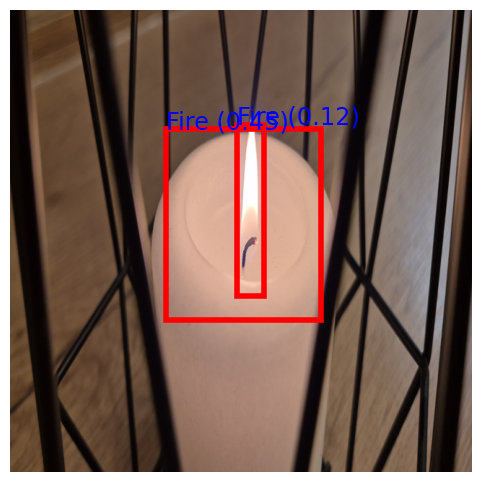

In [31]:
# code goes here
draw_boxes(candle_res, pred_mask, 0.1) 


<b>Exercise 2.12. [5 Points]</b>
   
<b>Goal:</b> Use an online <i><b>real video.</b></i>.

<b>Task</b>
<ul> 
<li>Use the <i><b>Fire_Vid_A301</b></i> video from the <i><b>resources</b></i> folder.</li>
<span style="color:rgb(190,48,48)">Use the <i><b>trained model</b></i> variable from Exercise 2.7 (do not regenerate it). Regenerating the model will result in a deduction of points.</span>
<li>Use <i><b>0.1</b></i> as the value for the <i><b>threshold</b></i> attribute. </li>
<li>Demonstrate four false positive cases arranged in a $2 \times 2$ grid.</li>
<li>Demonstrate four false negative cases arranged in a $2 \times 2$ grid.</li>
</ul>

<b>Hint</b>
<ul>
<li>Make sure that the cell containing the <i><b>detection_FRCNN</b></i> function has been executed.</li>
<li><span style="color:rgb(200,10,10)">All frames with bounding box detections are saved in the folder named <i><b>Results_Fire_Vid_A301</b></i> inside the <i><b>resources</b></i> directory.</span></li>
<li><span style="color:rgb(180,10,10)">Any kind of changes or modifications in the <i><b>detection_FRCNN</b></i> function will not be accepted. The result will be displayed in a separate window.</span></li>
</ul>

In [ ]:
def detection_FRCNN(model_FRCNN, video_path_FRCNN, args_threshold_FRCNN):
    cap = cv.VideoCapture(video_path_FRCNN)
    frame_width, frame_height = int(cap.get(3)), int(cap.get(4))
    framesNumber_inFRCNN = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    print('Total number of frames in this Exercise:', framesNumber_inFRCNN)
    frame_count = 0
    COCO_CLASSES = {0: "None", 1: "Fire"}
    while cap.isOpened():        
        ret, frame = cap.read()
        if not ret:
            print('No frames grabbed!')
            break
        frame_tensor = F.to_tensor(frame).unsqueeze(0)
        with torch.no_grad():
            det_start_time = time.time()
            detections = model_FRCNN(frame_tensor)[0]
            det_end_time = time.time()
        det_fps = 1 / (det_end_time - det_start_time)
        frame_count += 1            
        boxes = detections['boxes'].cpu().numpy()
        labels = detections['labels'].cpu().numpy()
        scores = detections['scores'].cpu().numpy()
        for box, label, score in zip(boxes, labels, scores):
            if score >= args_threshold_FRCNN:
                x_min, y_min, x_max, y_max = map(int, box)
                class_name = COCO_CLASSES.get(label, "Unknown")
                cv.rectangle(frame, (x_min, y_min), (x_max, y_max), color=(0, 0, 255), thickness=2)
                cv.putText(frame, f"{class_name}: {score:.2f}", (x_min, y_min - 10), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv.imshow("Output", frame)
        if cv.waitKey(30) & 0xFF == ord('q'):
            break
        os.makedirs('resources/Results_Fire_Vid_A301', exist_ok=True)
        cv.imwrite(f'resources/Results_Fire_Vid_A301/{frame_count}.jpg', frame)
    print(f"All {framesNumber_inFRCNN} frames are DONE in this Exercise")
    cap.release()
    cv.destroyAllWindows()

In [ ]:
# code goes here



<b>Exercise 2.13. [10 Points]</b>

<b>Question</b>
<ul> 
<li>Q1) In Exercise 2.11, what is your optimal threshold?, and why? Please provide sufficient explanation.</li>
<li>Q2) Referring to the code above (from Ex 2.1 to 2.12), what is the optimal place to implement data augmentation?</li>
</ul>

<b>Hint</b>
<ul>
<li>Each question must be answered in <i><b>1~4 lines</b></i> maximum. Exceeding 4 lines may result in point deductions.</li>
</ul>

<b>The explanation goes here:</b>

A1) 

A2) 

<a name="Object-Tracking"></a><h2>Object Tracking</h2>
    
The main goal is to utilize a popular technique in object tracking. In this assignment, the Deep SORT algorithm is used. The idea is that any tracker requires a detection algorithm to identify the intended objects, and the tracker can then follow them using consistent IDs.

<h4 style="color:rgb(100,10,10)">For your reference, the link of the paper is available <a href="https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjrq9Hwn-eOAxUL7AIHHQ2MH1AQFnoECBUQAQ&url=https%3A%2F%2Farxiv.org%2Fpdf%2F1703.07402%2F1000&usg=AOvVaw1B290MoLHUSJAjCPavQukJ&opi=89978449">Here</a> </h4>

<a name=">Apply-Deep-SORT-and-Faster-R-CNN-for-object-detection-and-tracking"></a><h3>Apply Deep SORT and Faster R-CNN for object detection and tracking</h3>

<h4 style="color:rgb(100,0,200)">In this section, we will exploite our <i><b>trained Faster R-CNN</b></i>  model to detect fires. Then, the deep SORT to track the detected fires.</h4>

<h4 style="color:rgb(100,0,150)"> In other words, we combine Faster R-CNN as our detector with the deep SORT as our tracker.</h4>

<a></a><h4 style="color:rgb(100,0,200)">Here is the example of detection and tracking</h4>
<img src="resources/Tracking_football_A3.gif" alt="Image not found!"/>

<b>Exercise 3.1. [3 Points]</b>
   
<b>Goal:</b> Let's create the <i><b>DeepSort</b></i> tracker.

<b>Task</b>
<ul> 
<li>Create the tracker using the <i><b>DeepSort</b></i> class from Deep SORT GitHub Repository.</li>
<li>Use the following parameters: <ul> 
    <li>Maximum number of missed detections: <b>28</b></li>
    <li>Embedder: <b>mobilenet</b></li>
    <li>Threshold for cosine distance: <b>0.22</b></li> 
    <li>Non-maxima suppression (NMS) threshold: <b>0.95</b></li> 
    <li>Intersection over Union (IoU) threshold: <b>0.69</b></li> 
</ul> 
</li>  
</ul>

<b>Hint</b>
<ul> 
<li>You can use the following link to learn how to set the parameters:</li>
    <a href="https://github.com/levan92/deep_sort_realtime/tree/master">Deep SORT GitHub Repository</a>
</ul>

In [ ]:
# code goes here



<b>Exercise 3.2. [7 Points]</b>
   
<b>Goal:</b> Apply the <i><b>DeepSort</b></i> algorithm.

<b>Task</b>
<ul>
<li>Use the <i><b>Fire_Vid_A302</b></i> video inside the <i><b>resources</b></i> folder.</li>
<li>Use the same trained model from <i><b>Exercise 2.7</b></i>.</li>
<li>Use the tracker you created in <i><b>Exercise 3.1</b></i>.</li>
<li>provide our trained model, our created tracker, and the provided Video to the <i><b>deepSORT_Visual</b></i> function to detect and track fires.</li>
<li>You can use any value between  <i><b>0 and 1</b></i> for the <i><b>threshold</b></i> attribute. We would suggest using a small value since we are running a small number of epochs and training images.</li>
</ul>

<b>Hint</b>
<ul>
<li>You need to run the functions <i><b>convert_detections, and annotate</b></i>, as they are used inside the <i><b>deepSORT_Visual</b></i> function.</li>
<li><span style="color:rgb(180,10,10)">Any kind of changes or modifications in the <i><b>deepSORT_Visual</b></i> function will not be accepted. The result will be displayed in a separate window.</span></li>
<li><span style="color:rgb(190,48,48)">Use the <i><b>trained model</b></i> variable from Exercise 2.7 (don’t regenerate it). Regenerating it will result in a deduction of points.</span></li>
</ul>

In [ ]:
def convert_detections(detections_ConvertFn, threshold_ConvertFn, classes_ConvertFn):
    # Get the bounding boxes, labels and scores from the detections dictionary.
    boxes = detections_ConvertFn["boxes"].cpu().numpy()
    labels = detections_ConvertFn["labels"].cpu().numpy()
    scores = detections_ConvertFn["scores"].cpu().numpy()
    lbl_mask = np.isin(labels, classes_ConvertFn)
    scores = scores[lbl_mask]
    
    mask = scores > threshold_ConvertFn
    boxes = boxes[lbl_mask][mask]
    scores = scores[mask]
    labels = labels[lbl_mask][mask]
    
    final_boxes = []
    for i, box in enumerate(boxes):
        final_boxes.append(( [box[0], box[1], box[2] - box[0], box[3] - box[1]], scores[i], str(labels[i])  ) )
    return final_boxes

def annotate(tracks_annotFn, frame_annotFn, resized_frame_annotFn, frame_width_annotFn, frame_height_annotFn):
    for track in tracks_annotFn:
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        x1, y1, x2, y2 = track.to_ltrb()
        p1 = (int(x1/resized_frame_annotFn.shape[1]*frame_width_annotFn), int(y1/resized_frame_annotFn.shape[0]*frame_height_annotFn))
        p2 = (int(x2/resized_frame_annotFn.shape[1]*frame_width_annotFn), int(y2/resized_frame_annotFn.shape[0]*frame_height_annotFn))
        
        # Annotate boxes.
        cv.rectangle( frame_annotFn, p1, p2, color=(0, 0, 255), thickness=2 )
        
        # Annotate ID.
        cv.putText( frame_annotFn, f"ID: {track_id}", (p1[0], p1[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, lineType=cv.LINE_AA )
    return frame_annotFn

In [ ]:
def deepSORT_Visual(tracker_A3, model_A3, video_path_A3, args_threshold, args_imgsz=None, save_Result=False):

    cap = cv.VideoCapture(video_path_A3)
    frame_width, frame_height = int(cap.get(3)), int(cap.get(4))
    framesNumber_inDeepSORT = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    print( 'Total number of frames in this Exercise is ', framesNumber_inDeepSORT )

    args_cls, frame_count = 1, 0
    
    while cap.isOpened():        
        ret, frame = cap.read()

        if not ret:
            print('No frames grabbed!')
            break
            
        if args_imgsz != None:
            resized_frame = cv.resize( cv.cvtColor(frame, cv.COLOR_BGR2RGB),(args_imgsz, args_imgsz))
        else:
            resized_frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        frame_tensor = ToTensor()(resized_frame).unsqueeze(0)

        start_time = time.time()
        # Feed frame to model and get detections.
        det_start_time = time.time()
        with torch.no_grad():
            detections = model_A3(frame_tensor)[0]
        det_end_time = time.time()
 
        det_fps = 1 / (det_end_time - det_start_time)
    
        # Convert detections to Deep SORT format.
        detections = convert_detections(detections, args_threshold, args_cls)
    
        # Update tracker with detections.
        tracks = tracker_A3.update_tracks(detections, frame=frame)
        end_time = time.time()

        frame_count += 1            
        # Draw bounding boxes and labels on frame.
        if len(tracks) > 0:
            frame = annotate( tracks, frame, resized_frame, frame_width, frame_height)
            
        cv.imshow("Output", frame)
        k = cv.waitKey(30)
            
        if save_Result:
            if not os.path.exists('resources/Fire_Results'): os.mkdir('resources/Fire_Results')
            cv.imwrite('resources/Fire_Results/'+ str(frame_count) +'.jpg', frame)
            
    print(f"All {framesNumber_inDeepSORT} frames are DONE in this Exercise")
    cap.release()
    cv.destroyAllWindows()

In [ ]:
# code goes here



<a name=">Testing-Deep-SORT-with-Faster-R-CNN-on-Your-Own-Video"></a><h3>Testing Deep SORT with Faster R-CNN on a video you recorded yourself</h3>

<b>Exercise 3.3. [10 Points]</b>
   
<b>Goal:</b> Apply and test our trained model using <i><b>a video captured by you</b></i>.

<b>Task</b>
<ul> 
<li>Record a video showing any flame (e.g., a candle or lighter) for <i><b>10</b></i> seconds, and move the flame in front of the camera.</li> 
<li>Save the video in the <i><b>resources</b></i> folder.</li>
<li>Use the same trained model from <i><b>Exercise 2.7</b></i>.</li>   
<li>Use the tracker you created in <i><b>Exercise 3.1</b></i>.</li>
<li>Provide the trained model, the created tracker, and your video to the <i><b>deepSORT_Visual</b></i> function to detect and track fires. <span style="color:rgb(200,10,10)">You need to change the parameter <i><b>save_Result</b></i> to <i><b>True</b></i> in <i><b>deepSORT_Visual</b></i> function.</span></li>
<li>You can use any value between  <i><b>0 and 1</b></i> for the <i><b>threshold</b></i> attribute.</li> 
<li><span style="color:rgb(200,10,10)">All frames with bounding box detections are saved in the folder named <i><b>Fire_Results</b></i> inside the <i><b>resources</b></i> directory.</span></li>
<li>Demonstrate two failure cases and two success cases in a $2 \times 2$ grid. The first row and the second row demonstrate the success and failure cases, respectively.</li>
</ul>

<b>Hint</b>
<ul> 
<li>Do not include any sensitive information in the video, such as <i><b>names, bank cards, license plates, etc</b></i>.</li>
<li>Failure cases refer to misdetections or mistrackings of the fire, or false positive detections <i><b>only</b></i>.</li>
<li>Success cases refer to successful detection and tracking of the fire, even if some false positives are present.</li>
<li>You can use any value for the <i><b>args_imgsz</b></i> parameter to resize the image if your video has a high resolution.</li>
<li><span style="color:rgb(190,48,48)">Use the <i><b>trained model</b></i> variable from Exercise 2.7 (don’t regenerate it). Regenerating it will result in a deduction of points.</span></li>
<li><span style="color:rgb(180,10,10)">All necessary functions defined above must be called without copying them again. Otherwise, points will be deducted.</span></li>
<li><span style="color:rgb(180,10,10)">The use of the same video across multiple submissions is not allowed.</span></li>
</ul>

In [ ]:
# code goes here



<b>Exercise 3.4. [20 Points]</b>

<b>Question</b>
<ul>
<li>Q1) What conditions would cause the tracker (from Exercise 3.2) to fail?</li> 
<li>Q2) How can the tracker (from Exercise 3.2) find the object again after losing it?</li>
<li>Q3) Why don’t we perform only classification without the tracker in Exercise 3.2?</li>
<li>Q4) Why do we get new labels when an object is lost and then re-tracked?</li>
</ul>

<b>Hint</b>
<ul>
<li>Each question must be answered in <i><b>1~4 lines</b></i> maximum. Exceeding 4 lines may result in point deductions.</li>
</ul>

<b>The explanation goes here:</b>

A1) 

A2) 

A3) 

A4) 